## The Sparks Foundation - Graduate Rotational Internship Program
### Data science and Business Analytics
### Author : Radwa Mohamed
### Batch : April 2022
### Task3 : Exploratory Data Analysis - Retail

### This data belongs to a superstore and we aim to find out the week areas where we can work to make more profit

In [42]:
# import statements for all of the packages we need 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
df = pd.read_csv("SampleSuperstore.csv")

### Data Wrangling

In [44]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [45]:
df.shape

(9994, 13)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [47]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [48]:
df.duplicated().sum()

17

In [49]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

 I found out from the data that there is 17 duplicate rows we have to handle it  
 The data have not missing values.

In [50]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

### Data Cleaning

After discussing the structure of the data and any problems that need to be cleaned, perform those cleaning steps in the second part of this section

In [51]:
# Rename columns to make it easier to treat with 
df.rename(columns=lambda x: x.strip().lower().replace(" ","_").replace('-','_'), inplace=True)
df.head()

,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,sales,quantity,discount,profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [52]:
# Drop all the duplicate rows
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### Exploratory Data Analysis

#### General vision

<AxesSubplot:>

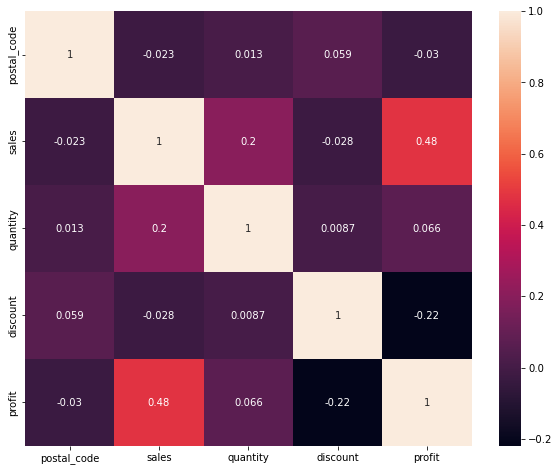

In [53]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

 profit and sales have a large positive correlation, but profit and discount have a negative correlation.

#### Data Analysis based on states

In [54]:
# sales per state
df_sales = df.groupby(['state'], as_index=False).sales.sum()
df_sales

,state,sales
0,Alabama,19510.6400
1,Arizona,35282.0010
2,Arkansas,11678.1300
3,California,457576.2715
4,Colorado,32108.1180
5,Connecticut,13384.3570
6,Delaware,27451.0690
7,District of Columbia,2865.0200
8,Florida,89473.7080
9,Georgia,49095.8400


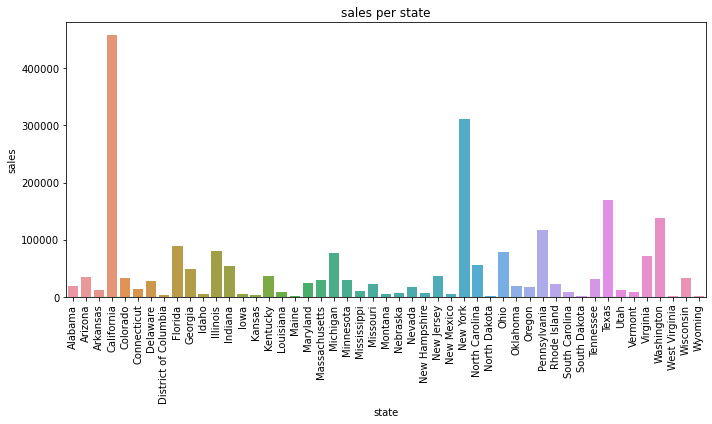

In [55]:
plt.figure(figsize=(10,6))
sns.barplot(x='state', y='sales', data=df_sales)
plt.xticks(rotation=90)
plt.title('sales per state')
plt.tight_layout();

California and New York have the highest sales among states.

In [56]:
# profit that every state made it
df_profit = df.groupby(['state'], as_index=False).profit.sum()
df_profit

,state,profit
0,Alabama,5786.8253
1,Arizona,-3427.9246
2,Arkansas,4008.6871
3,California,76330.7891
4,Colorado,-6527.8579
5,Connecticut,3511.4918
6,Delaware,9977.3748
7,District of Columbia,1059.5893
8,Florida,-3399.3017
9,Georgia,16250.0433


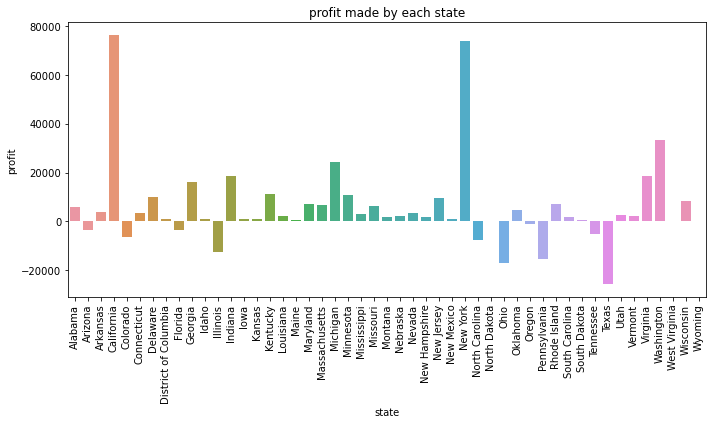

In [57]:
plt.figure(figsize=(10,6))
sns.barplot(x='state', y='profit', data=df_profit)
plt.xticks(rotation=90)
plt.title('profit made by each state')
plt.tight_layout();

Texas, Tennessee, Ohio, Pennsylvania, Oregon, North Carolina, Lllinois, Florida, Colorado and Arizona all these states didn't make any profit besides losing so that is the weak areas we search about.
California and New York made the highest profit of all states.

In [58]:
# correlation between sales and profit for weak areas
weak_areas = df.query('profit <= 0')
weak_areas.groupby('state')[['sales', 'profit']].sum().sort_values(by='sales', ascending=False)

,sales,profit
state,,
Texas,105054.0378,-36813.1875
Pennsylvania,78976.7420,-21602.8515
Ohio,51145.9660,-21737.9414
Florida,49400.7960,-8689.8295
California,42278.3660,-3769.6651
Illinois,39349.8120,-19495.4605
New York,28712.9800,-5031.1378
North Carolina,28590.4600,-11557.9854
Tennessee,17746.4970,-7257.0174


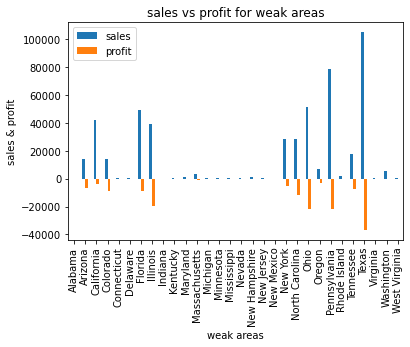

In [59]:
# relation between sales and profit for weak areas
weak_areas.groupby('state')[['sales', 'profit']].sum().plot(kind='bar')
plt.xlabel('weak areas')
plt.ylabel('sales & profit')
plt.title('sales vs profit for weak areas')
plt.show();

 Texas is the highest in sales among those states, but it is also the least profitable!.

### Data analysis based on category

In [60]:
# count of each category
df['category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: category, dtype: int64

Text(0.5, 1.0, 'count of each category')

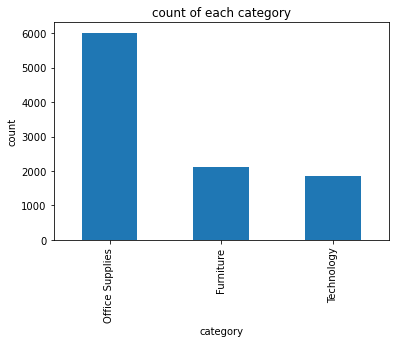

In [61]:
df['category'].value_counts().plot(kind='bar')
plt.xlabel('category')
plt.ylabel('count')
plt.title('count of each category')

office supplies category is the most popular category.

In [62]:
# profit and sales according to category
df_category = df.groupby('category')[['profit','sales']].sum()
df_category

,profit,sales
category,,
Furniture,18421.8137,741306.3133
Office Supplies,122364.6608,718735.2440
Technology,145454.9481,836154.0330


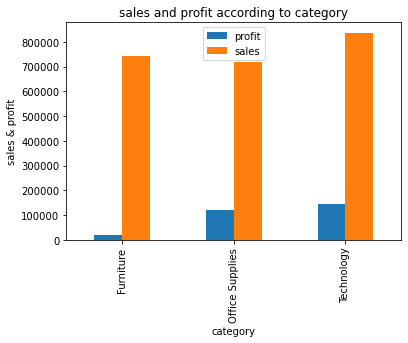

In [63]:
df_category.plot(kind='bar')
plt.xlabel('category')
plt.ylabel('sales & profit')
plt.title('sales and profit according to category')
plt.show();

 They are almost the same but Furniture is lowest category in profit.

### Data Analysis based on sub category

In [64]:
# count of each sub category
df['sub_category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: sub_category, dtype: int64

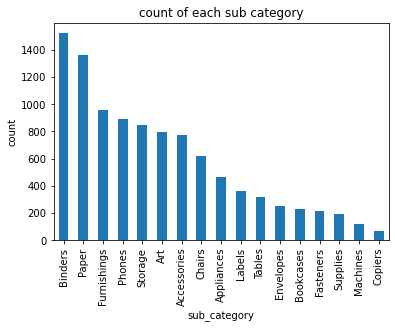

In [65]:
df['sub_category'].value_counts().plot(kind='bar')
plt.xlabel('sub_category')
plt.ylabel('count')
plt.title('count of each sub category');

Binders sub category is the most popular sub category.

In [66]:
# profit and sales according to category
df_sub_category = df.groupby('sub_category')[['profit','sales']].sum()
df_sub_category

,profit,sales
sub_category,,
Accessories,41936.6357,167380.3180
Appliances,18138.0054,107532.1610
Art,6524.6118,27107.0320
Binders,30228.0003,203409.1690
Bookcases,-3472.5560,114879.9963
Chairs,26567.1278,327777.7610
Copiers,55617.8249,149528.0300
Envelopes,6964.1767,16476.4020
Fasteners,949.5182,3024.2800


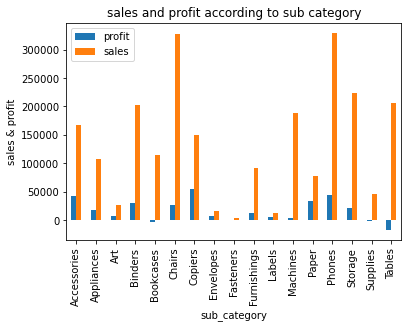

In [67]:
df_sub_category.plot(kind='bar')
plt.xlabel('sub_category')
plt.ylabel('sales & profit')
plt.title('sales and profit according to sub category')
plt.show();

Tables sub category is the least profit, chairs and phones are the highest sales.

### Conclusion

#### In states
Texas is the most losing state in profit while California is the highest profitability.
North Dakota makes the lowest sales while California makes the highest sales.

According to weak areas, Texas makes the highest sales.
#### In category
office supplies category is the most popular category and Furniture is lowest category in profit.
#### In sub-category
The binders subcategory is the most popular subcategory.
Tables subcategory is the least profit, chairs and phones are the highest sales.